In [33]:
#Importing packages
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math

In [34]:
# Reading in data we cleaned
df = pd.read_csv('data/exported_data.csv')

In [35]:
df.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per
0,33.264033,62.176022,45.084746,53.587571,Michigan,"Presque Isle County, Michigan",14.7,85.3,97.05,0.2,0.30,13.85,9.6,14.7,393475,14.3,4.7,0.070504,0.037034,0.033471,0.193137,0.097412,0.095725,0.376055,0.185824,0.190231,0.360304,0.178417,0.181886
1,41.088014,53.565475,50.177448,48.576131,Michigan,"Calhoun County, Michigan",12.9,87.1,80.65,1.6,10.45,8.35,4.8,16.8,5594998,18.8,6.5,0.118989,0.061094,0.057895,0.308407,0.151431,0.156975,0.352965,0.173308,0.179657,0.219640,0.096424,0.123215
2,28.744694,66.858702,40.316090,58.523357,Michigan,"Branch County, Michigan",13.4,86.6,90.35,0.6,3.05,8.05,4.8,16.8,1245185,14.1,4.8,0.101433,0.054194,0.047239,0.309689,0.170651,0.139038,0.362648,0.189468,0.173180,0.226230,0.103059,0.123171
3,36.855246,56.491599,51.061492,47.394519,Michigan,"Shiawassee County, Michigan",10.7,89.3,95.45,0.3,0.45,12.05,5.3,12.0,1602095,14.9,5.6,0.110296,0.057764,0.052533,0.289581,0.146615,0.142966,0.379568,0.186526,0.193042,0.220555,0.099090,0.121465
4,34.247700,61.432326,43.482538,55.697655,Michigan,"Mackinac County, Michigan",10.9,89.1,76.80,0.6,1.65,13.85,9.9,13.7,616120,20.1,7.6,0.078798,0.043072,0.035726,0.220924,0.114079,0.106845,0.384307,0.193322,0.190985,0.315971,0.155036,0.160935


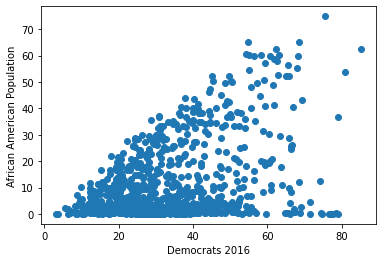

In [36]:
fig, ax = plt.subplots()
plt.scatter(df['Democrats 2016'], df['African American Population'])
ax.set_xlabel("Democrats 2016")
ax.set_ylabel("African American Population")
plt.show()

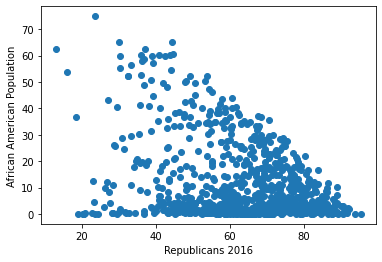

In [37]:
fig, ax = plt.subplots()
plt.scatter(df['Republicans 2016'], df['African American Population'])
ax.set_xlabel("Republicans 2016")
ax.set_ylabel("African American Population")
plt.show()

In [38]:
# tranforms gdp so its more linear
df['log_gdp'] = np.log10(df['realGDP2016'])

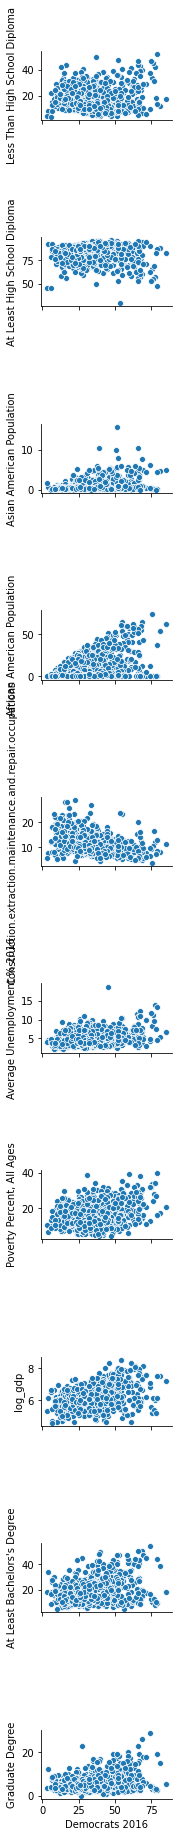

In [39]:
sns.pairplot(data=df,
                  x_vars=['Democrats 2016'],
                  y_vars=['Less Than High School Diploma', 'At Least High School Diploma', 
                          'Asian American Population','African American Population',
                          'Construction.extraction.maintenance.and.repair.occupations',
                         'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                          "At Least Bachelors's Degree", 
                         'Graduate Degree'])

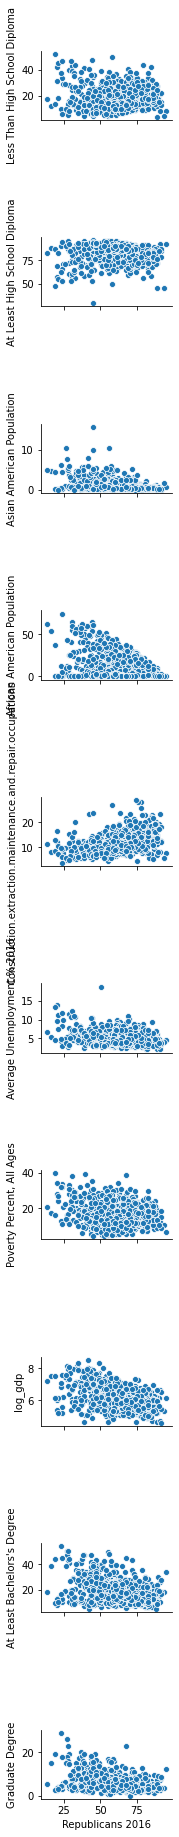

In [40]:
sns.pairplot(data=df,
                  x_vars=['Republicans 2016'],
                  y_vars=['Less Than High School Diploma', 'At Least High School Diploma', 
                          'Asian American Population','African American Population',
                          'Construction.extraction.maintenance.and.repair.occupations',
                         'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp',
                          "At Least Bachelors's Degree" , 'Graduate Degree'])

In [41]:
df.head()

,Democrats 2016,Republicans 2016,Democrats 2012,Republicans 2012,State,County,Less Than High School Diploma,At Least High School Diploma,White (Not Latino) Population,Asian American Population,African American Population,Construction.extraction.maintenance.and.repair.occupations,Average Unemployment % 2016,"Poverty Percent, All Ages",realGDP2016,At Least Bachelors's Degree,Graduate Degree,1824tot_per,1824M_per,1824F_per,2544tot_per,2544M_per,2544F_per,4564tot_per,4564M_per,4564F_per,65tot_per,65M_per,65F_per,log_gdp
0,33.264033,62.176022,45.084746,53.587571,Michigan,"Presque Isle County, Michigan",14.7,85.3,97.05,0.2,0.30,13.85,9.6,14.7,393475,14.3,4.7,0.070504,0.037034,0.033471,0.193137,0.097412,0.095725,0.376055,0.185824,0.190231,0.360304,0.178417,0.181886,5.594917
1,41.088014,53.565475,50.177448,48.576131,Michigan,"Calhoun County, Michigan",12.9,87.1,80.65,1.6,10.45,8.35,4.8,16.8,5594998,18.8,6.5,0.118989,0.061094,0.057895,0.308407,0.151431,0.156975,0.352965,0.173308,0.179657,0.219640,0.096424,0.123215,6.747800
2,28.744694,66.858702,40.316090,58.523357,Michigan,"Branch County, Michigan",13.4,86.6,90.35,0.6,3.05,8.05,4.8,16.8,1245185,14.1,4.8,0.101433,0.054194,0.047239,0.309689,0.170651,0.139038,0.362648,0.189468,0.173180,0.226230,0.103059,0.123171,6.095234
3,36.855246,56.491599,51.061492,47.394519,Michigan,"Shiawassee County, Michigan",10.7,89.3,95.45,0.3,0.45,12.05,5.3,12.0,1602095,14.9,5.6,0.110296,0.057764,0.052533,0.289581,0.146615,0.142966,0.379568,0.186526,0.193042,0.220555,0.099090,0.121465,6.204688
4,34.247700,61.432326,43.482538,55.697655,Michigan,"Mackinac County, Michigan",10.9,89.1,76.80,0.6,1.65,13.85,9.9,13.7,616120,20.1,7.6,0.078798,0.043072,0.035726,0.220924,0.114079,0.106845,0.384307,0.193322,0.190985,0.315971,0.155036,0.160935,5.789665


In [8]:
df_features = df[['Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population','Construction.extraction.maintenance.and.repair.occupations',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per','65tot_per',
             '65M_per','65F_per']]

In [26]:
# Creating train test split
x_train, x_test, y_train, y_test = train_test_split(df_features, df['Democrats 2016'], test_size=0.2,shuffle=True)

In [27]:
# SIMPLE linear regression just to see

model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
model.score(x_test,y_test)

0.5657072377439107

In [28]:
model.score(x_train,y_train)

0.6081239199926726

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

78.1945550489164

In [42]:
df_features2 = df[['Democrats 2012', 'Republicans 2012','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population','Construction.extraction.maintenance.and.repair.occupations',
           'Average Unemployment % 2016','Poverty Percent, All Ages', 'log_gdp', 
                  "At Least Bachelors's Degree", 'Graduate Degree','1824tot_per','1824M_per',
             '1824F_per','2544tot_per','2544M_per','2544F_per','4564tot_per','4564M_per','4564F_per','65tot_per',
             '65M_per','65F_per']]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(df_features2, df['Democrats 2016'], test_size=0.2,shuffle=True)

In [57]:
model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
model.score(x_test,y_test)

0.9742978722437196

In [58]:
model.score(x_train,y_train)

0.9805642223278027

In [59]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

4.818011365862697

In [60]:
df_features3 = df[['Democrats 2012', 'Republicans 2012']]
x_train, x_test, y_train, y_test = train_test_split(df_features3, df['Democrats 2016'], test_size=0.2,shuffle=True)
model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
model.score(x_test,y_test)



0.8735881836744124

In [61]:
model.score(x_train,y_train)

0.8840939910485992

In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

25.554328530059898

In [8]:
# Begin running models with different subsets of features and feature combinations (polynomial terms??, interaction terms??)
# to determine which ones result in best validation error



In [9]:
# examine training and validation error to pick a model



In [10]:
# any outliers skewing our validation error?



In [11]:
# define next steps for the final report portion of the project

